# Regression Modeling

Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
from math import sqrt
from sklearn.metrics import mean_squared_error

Read in Table

In [4]:
rents = pd.read_csv('Rental_Table.csv')

In [6]:
rents.drop('Unnamed: 0', axis=1, inplace=True)
rents

,price,type,bedrooms,full_baths,half_baths,sleeps,distance,reviews,bathrooms,duplicate
0,643,House,5,5,0,14,3.0,3,5.0,False
1,450,Townhome,5,4,1,10,11.0,19,4.5,False
2,357,Condo,3,2,0,8,13.0,8,2.0,False
3,432,House,4,3,0,10,5.0,5,3.0,False
4,379,Townhome,4,2,0,10,11.0,41,2.0,False
...,...,...,...,...,...,...,...,...,...,...
267,207,Condo,1,1,0,6,15.0,4,1.0,False
268,825,Condo,4,3,0,12,0.0,20,3.0,False
269,329,Townhome,3,2,0,7,9.0,15,2.0,False
270,300,House,4,3,1,10,3.0,18,3.5,False


Creating a baseline regression with bedrooms, sleeps, distance, reviews, and bathrooms as baseline features

In [7]:
baseline = rents.copy()

In [8]:
baseline.drop(['type', 'full_baths', 'half_baths', 'duplicate'], axis=1, inplace=True)
baseline

,price,bedrooms,sleeps,distance,reviews,bathrooms
0,643,5,14,3.0,3,5.0
1,450,5,10,11.0,19,4.5
2,357,3,8,13.0,8,2.0
3,432,4,10,5.0,5,3.0
4,379,4,10,11.0,41,2.0
...,...,...,...,...,...,...
267,207,1,6,15.0,4,1.0
268,825,4,12,0.0,20,3.0
269,329,3,7,9.0,15,2.0
270,300,4,10,3.0,18,3.5


In [9]:
from sklearn.model_selection import KFold

X, y = baseline.drop(['price'], axis=1), baseline['price']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [13]:
#run the CV

kf = KFold(n_splits=5, shuffle=True)
cv_lm_r2s, cv_lm_reg_r2s, cv_lm_poly_r2s, cv_lm, cv_lm_reg, cv_lm_poly = [], [], [], [], [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)
    lm_poly = LinearRegression()
    
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    cv_lm.append(lm.score(X_train, y_train))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    cv_lm_reg.append(lm_reg.score(X_train_scaled, y_train))

    #polynomial degree 2
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    cv_lm_poly.append(lm_poly.score(X_train_poly, y_train))
    
    
    
    
print('coefficients', lm.coef_)    
print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')
print('Poly scores: ', cv_lm_poly_r2s, '\n')
print('Train Simple regression scores: ', cv_lm)
print('Train Ridge scores: ', cv_lm_reg, '\n')
print('Train Poly scores: ', cv_lm_poly, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')
print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}')
print(f'Train Simple mean cv r^2: {np.mean(cv_lm):.3f} +- {np.std(cv_lm):.3f}')
print(f'Train Ridge mean cv r^2: {np.mean(cv_lm_reg):.3f} +- {np.std(cv_lm_reg):.3f}')
print(f'Train Poly mean cv r^2: {np.mean(cv_lm_poly):.3f} +- {np.std(cv_lm_poly):.3f}')

coefficients [46.10784792  2.93512184 -4.29204477 -1.25205285 41.64579684]
Simple regression scores:  [0.49333669264724245, 0.5161176554690261, 0.3690867735248351, 0.18634281388774665, 0.5507214532183176]
Ridge scores:  [0.49345657171286883, 0.5155908678990078, 0.3721269673156483, 0.18755020989761173, 0.5495786113349818] 

Poly scores:  [0.4897773535226846, 0.4411532563892965, 0.2552564328136956, 0.014712220443488744, 0.4673747051934136] 

Train Simple regression scores:  [0.49458322811361544, 0.48245111170588373, 0.5158625828877962, 0.5290095916091877, 0.4804625244640308]
Train Ridge scores:  [0.4945654587596051, 0.48243638196062877, 0.5158275764347844, 0.5289928357989488, 0.4804498490094694] 

Train Poly scores:  [0.5406552511328653, 0.5271731569850681, 0.5552065855996615, 0.5800788004250469, 0.5320622826450698] 

Simple mean cv r^2: 0.423 +- 0.133
Ridge mean cv r^2: 0.424 +- 0.132
Poly mean cv r^2: 0.334 +- 0.180
Train Simple mean cv r^2: 0.500 +- 0.019
Train Ridge mean cv r^2: 0.50

In [14]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

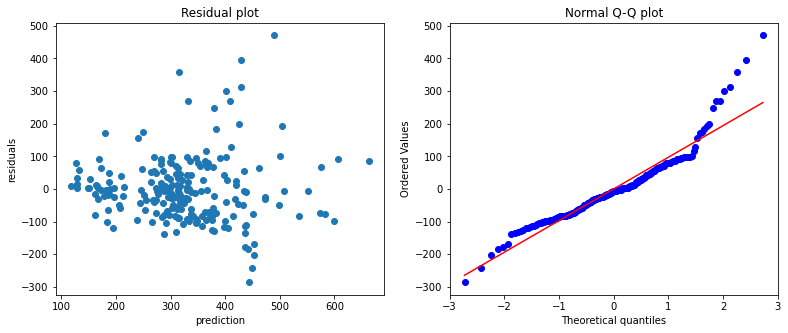

In [15]:
diagnostic_plot(X, y) # we reshape x to turn it into a tall column

Not a great model and showing signs of not following error assumptions

Changing to log(price) as target since the histogram is skewed

In [16]:
log_price = rents.copy()

In [17]:
log_price.drop(['type', 'full_baths', 'half_baths', 'duplicate'], axis=1, inplace=True)

In [18]:
log_price['log_price'] = np.log(log_price['price'])
log_price

,price,bedrooms,sleeps,distance,reviews,bathrooms,log_price
0,643,5,14,3.0,3,5.0,6.466145
1,450,5,10,11.0,19,4.5,6.109248
2,357,3,8,13.0,8,2.0,5.877736
3,432,4,10,5.0,5,3.0,6.068426
4,379,4,10,11.0,41,2.0,5.937536
...,...,...,...,...,...,...,...
267,207,1,6,15.0,4,1.0,5.332719
268,825,4,12,0.0,20,3.0,6.715383
269,329,3,7,9.0,15,2.0,5.796058
270,300,4,10,3.0,18,3.5,5.703782


In [19]:
from sklearn.model_selection import KFold

X, y = log_price.drop(['price', 'log_price'], axis=1), log_price['log_price']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [20]:
#run the CV

kf = KFold(n_splits=5, shuffle=True)
cv_lm_r2s, cv_lm_reg_r2s, cv_lm_poly_r2s, cv_lm, cv_lm_reg, cv_lm_poly = [], [], [], [], [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=.01)
    lm_poly = LinearRegression()
    
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    cv_lm.append(lm.score(X_train, y_train))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    cv_lm_reg.append(lm_reg.score(X_train_scaled, y_train))

    #polynomial degree 2
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    cv_lm_poly.append(lm_poly.score(X_train_poly, y_train))
    
    
    
    
print('coefficients', lm.coef_)    
print('coefficients', lm_reg.coef_)  
print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')
print('Poly scores: ', cv_lm_poly_r2s, '\n')
print('Train Simple regression scores: ', cv_lm)
print('Train Ridge scores: ', cv_lm_reg, '\n')
print('Train Poly scores: ', cv_lm_poly, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')
print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}')
print(f'Train Simple mean cv r^2: {np.mean(cv_lm):.3f} +- {np.std(cv_lm):.3f}')
print(f'Train Ridge mean cv r^2: {np.mean(cv_lm_reg):.3f} +- {np.std(cv_lm_reg):.3f}')
print(f'Train Poly mean cv r^2: {np.mean(cv_lm_poly):.3f} +- {np.std(cv_lm_poly):.3f}')

coefficients [ 0.1673926   0.00391015 -0.0068036  -0.00188273  0.12560724]
coefficients [ 0.19529045  0.01090558 -0.02584538 -0.02920668  0.1230866 ]
Simple regression scores:  [0.6509294700025864, 0.307984944181669, 0.4161490205481402, 0.5440609878032461, 0.5771907591590787]
Ridge scores:  [0.6509180095051113, 0.3080043719695691, 0.4161639238567324, 0.5440688728674946, 0.5771807260140435] 

Poly scores:  [0.4366268416706037, 0.21838361187297506, 0.43136792598259865, 0.44804148487827267, 0.6241903848359605] 

Train Simple regression scores:  [0.5118076865708261, 0.5761815887126571, 0.5783588948163862, 0.5332371504689135, 0.5312689803793325]
Train Ridge scores:  [0.5118076849534257, 0.5761815862256972, 0.5783588907247803, 0.533237147327642, 0.5312689781334928] 

Train Poly scores:  [0.6047591589002379, 0.6526133660887332, 0.6147565528953517, 0.6077225571078662, 0.5922991104463158] 

Simple mean cv r^2: 0.499 +- 0.122
Ridge mean cv r^2: 0.499 +- 0.122
Poly mean cv r^2: 0.432 +- 0.129
Tra

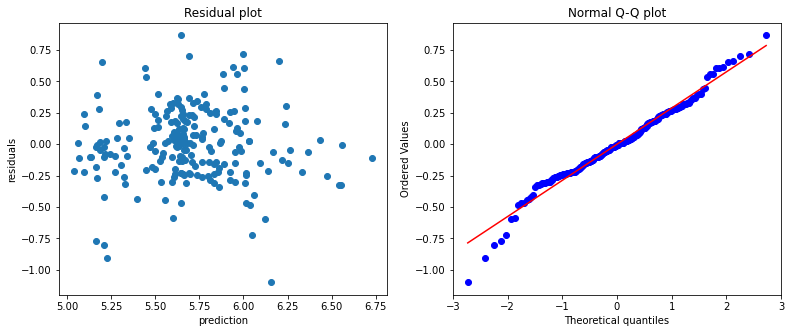

In [21]:
diagnostic_plot(X, y)

Better results overall due to this change.  
Continued trying out different models to find the best model, models are not shown though.  
Note: Ridge and Lasso did not help the model improve at all.  
Note: Due to collinearity between sleeps and bedrooms, the final model only uses bedrooms as it was the superior feature compared to sleeps and the combination.  

In [22]:
type_dummy = rents.copy()
type_dummy

,price,type,bedrooms,full_baths,half_baths,sleeps,distance,reviews,bathrooms,duplicate
0,643,House,5,5,0,14,3.0,3,5.0,False
1,450,Townhome,5,4,1,10,11.0,19,4.5,False
2,357,Condo,3,2,0,8,13.0,8,2.0,False
3,432,House,4,3,0,10,5.0,5,3.0,False
4,379,Townhome,4,2,0,10,11.0,41,2.0,False
...,...,...,...,...,...,...,...,...,...,...
267,207,Condo,1,1,0,6,15.0,4,1.0,False
268,825,Condo,4,3,0,12,0.0,20,3.0,False
269,329,Townhome,3,2,0,7,9.0,15,2.0,False
270,300,House,4,3,1,10,3.0,18,3.5,False


In [23]:
type_dummy['type_dummy'] = 0
for i in range(272):
    if type_dummy['type'].iloc[i] == 'House':
        type_dummy['type_dummy'].iloc[i] = 1
    elif type_dummy['type'].iloc[i] == 'Townhome':
        type_dummy['type_dummy'].iloc[i] = 1

/Users/lucyallen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
type_dummy['log_price'] = np.log(type_dummy['price'])

In [25]:
type_dummy.drop(['full_baths', 'half_baths', 'duplicate', 'type'], axis=1, inplace=True)
type_dummy

,price,bedrooms,sleeps,distance,reviews,bathrooms,type_dummy,log_price
0,643,5,14,3.0,3,5.0,1,6.466145
1,450,5,10,11.0,19,4.5,1,6.109248
2,357,3,8,13.0,8,2.0,0,5.877736
3,432,4,10,5.0,5,3.0,1,6.068426
4,379,4,10,11.0,41,2.0,1,5.937536
...,...,...,...,...,...,...,...,...
267,207,1,6,15.0,4,1.0,0,5.332719
268,825,4,12,0.0,20,3.0,0,6.715383
269,329,3,7,9.0,15,2.0,1,5.796058
270,300,4,10,3.0,18,3.5,1,5.703782


In [26]:
review_dummy = type_dummy.copy()

In [27]:
review_dummy['review_dummy'] = 0
for i in range(271):
    if review_dummy['reviews'].iloc[i] > 5:
        review_dummy['review_dummy'].iloc[i] = 1

/Users/lucyallen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [28]:
poly_terms = review_dummy.copy()

In [29]:
poly_terms['distance_2'] = poly_terms['distance']**2

In [30]:
poly_terms

,price,bedrooms,sleeps,distance,reviews,bathrooms,type_dummy,log_price,review_dummy,distance_2
0,643,5,14,3.0,3,5.0,1,6.466145,0,9.0
1,450,5,10,11.0,19,4.5,1,6.109248,1,121.0
2,357,3,8,13.0,8,2.0,0,5.877736,1,169.0
3,432,4,10,5.0,5,3.0,1,6.068426,0,25.0
4,379,4,10,11.0,41,2.0,1,5.937536,1,121.0
...,...,...,...,...,...,...,...,...,...,...
267,207,1,6,15.0,4,1.0,0,5.332719,0,225.0
268,825,4,12,0.0,20,3.0,0,6.715383,1,0.0
269,329,3,7,9.0,15,2.0,1,5.796058,1,81.0
270,300,4,10,3.0,18,3.5,1,5.703782,1,9.0


In [31]:
from sklearn.model_selection import KFold

X, y = poly_terms.drop(['price', 'log_price', 'sleeps', 'reviews', 'review_dummy'], axis=1), poly_terms['log_price']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [33]:
#run the CV

kf = KFold(n_splits=5, shuffle=True)
cv_lm_r2s, cv_lm = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    cv_lm.append(lm.score(X_train, y_train))

   

  
print('coefficients', lm.coef_)    
print('Simple regression scores: ', cv_lm_r2s)
print('Train Simple regression scores: ', cv_lm)

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Train Simple mean cv r^2: {np.mean(cv_lm):.3f} +- {np.std(cv_lm):.3f}')

coefficients [ 0.16605236 -0.01207446  0.1297867   0.04688144  0.00024798]
Simple regression scores:  [0.6258489114289144, 0.41357230954465074, 0.5208874968616686, 0.6304102423509615, 0.3882376159984776]
Train Simple regression scores:  [0.5136081001033801, 0.5657902352557435, 0.53782647584269, 0.5077160249652919, 0.5774238926384863]
Simple mean cv r^2: 0.516 +- 0.102
Train Simple mean cv r^2: 0.540 +- 0.028


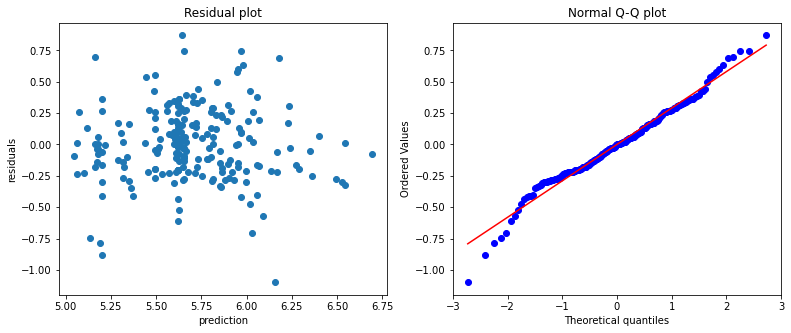

In [34]:
diagnostic_plot(X, y)

In [35]:
lm.fit(X, y)
lm.score(X_test, y_test)

0.5413355353930595

In [36]:
y_actual_CV = np.exp(y)
y_predicted_CV = np.exp(lm.predict(X))

In [37]:
sqrt(mean_squared_error(y_actual_CV, y_predicted_CV))

104.62472530388993

In [38]:
y_actual_test = np.exp(y_test)
y_predicted_test = np.exp(lm.predict(X_test))

In [39]:
sqrt(mean_squared_error(y_actual_test, y_predicted_test))

105.13530100363529

In [40]:
y_actual_test_1 = y_test
y_predicted_test_1 = lm.predict(X_test)

In [41]:
sqrt(mean_squared_error(y_actual_test_1, y_predicted_test_1))

0.2850746592969555

In [42]:
lm.coef_

array([ 1.79134996e-01, -1.00550480e-02,  1.16396324e-01,  4.79360311e-02,
        1.05188655e-04])

In [43]:
lm.intercept_

4.905354173573323

In [44]:
Results = X_test.copy()

In [45]:
Results['price'] = np.exp(y_test)

In [46]:
Results['pred_price'] = np.exp(lm.predict(X_test))

In [47]:
Results['diff'] = Results['price'] - Results['pred_price']

In [48]:
Results.head()

,bedrooms,distance,bathrooms,type_dummy,distance_2,price,pred_price,diff
180,1,1.0,0.0,0,1.0,216.0,159.898511,56.101489
24,3,11.0,2.5,1,121.0,350.0,294.067196,55.932804
183,3,2.0,2.0,0,4.0,300.0,285.963010,14.036990
214,3,4.0,2.5,0,16.0,369.0,297.440081,71.559919
56,3,5.0,1.5,0,25.0,314.0,262.357512,51.642488


Results Table shows how the test rows compared with the actual price and the predicted price.